## Análiza Exploratória de dados

In [1]:
import pandas as pd 
import inflection
import math
import seaborn as sns
import numpy as np
import datetime


from IPython.core.display import HTML
from matplotlib import pyplot as plt
from IPython.display import Image

In [2]:
df3 = pd.read_csv('F://Repos_DS//DS_em_Producao/df3_rossmann_store.csv', low_memory=False)

In [3]:
df3.head(2)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,promo2_since_year,is_promo,year,month,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270,...,2015,0,2015,7,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570,...,2010,1,2015,7,31,2015-30,2007-11-01,94,2010-03-22,279


### EDA (Exploration Data Analize) Exploração e análize de Dados

### A Motivação

Como as variáveis impactam o fenômeno?

Qual a força desse impacto?

### Quais os 3 objetivos da EDA?

**1** - Ganhar experiência de Negócio.

**2** - Validar Hipóteses de Negócio.(Insights)

**3** - Perceber variáveis que são importantes para o modelo.

### Análise Univariada:

- Como é essa variável? (Min, Max, Distribuição, Range,...)

### Análise Bivariada:

- Como a variável impacta na resposta? (Correlação, Validação das Hipóteses, ...)

### Análise Multivariada:

- Como as variáveis se relacionam? (Qual a correlação entre elas?)

In [5]:
df4 = df3.copy()

### Análise Univariada

In [21]:
plt.style.use( 'bmh')
plt.rcParams['figure.figsize'] = [50,24]
plt.rcParams['font.size'] = 25
    
#display( HTML( '<style>.container { width:100% !important;}</style>'))
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#pd.set_option( 'display.expand_frame_repr', False)


#### Response Variable

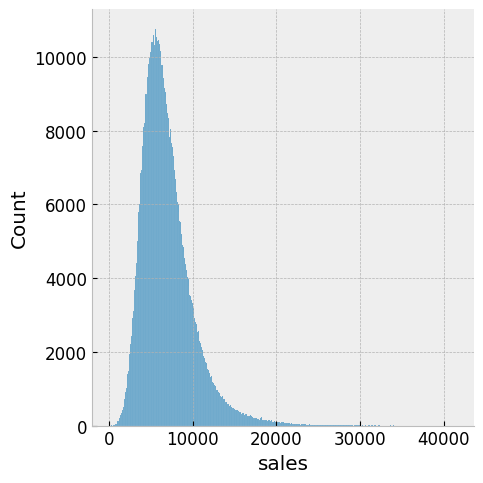

In [8]:
sns.displot(df4['sales'])

#### Numerical Variable

In [27]:
df4.dtypes

store                            int64
day_of_week                      int64
date                            object
sales                            int64
promo                            int64
state_holiday                   object
school_holiday                   int64
store_type                      object
assortment                      object
competition_distance             int64
competition_open_since_month     int64
competition_open_since_year      int64
promo2                           int64
promo2_since_week                int64
promo2_since_year                int64
is_promo                         int64
year                             int64
month                            int64
week_of_year                     int64
year_week                       object
competition_since               object
competition_time_month           int64
promo_since                     object
promo_time_week                  int64
dtype: object

In [29]:
df4 = df4[(df4['sales']  > 0)]

In [30]:
# dividir os atributos em numéricos e categórigos (objets)

num_attributes = df4.select_dtypes( include = ['int64', 'float64'])
cat_attributes = df4.select_dtypes( exclude = ['int', 'float','datetime64[ns]'])

In [31]:
num_attributes.columns

Index(['store', 'day_of_week', 'sales', 'promo', 'school_holiday',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'is_promo', 'year', 'month', 'week_of_year',
       'competition_time_month', 'promo_time_week'],
      dtype='object')

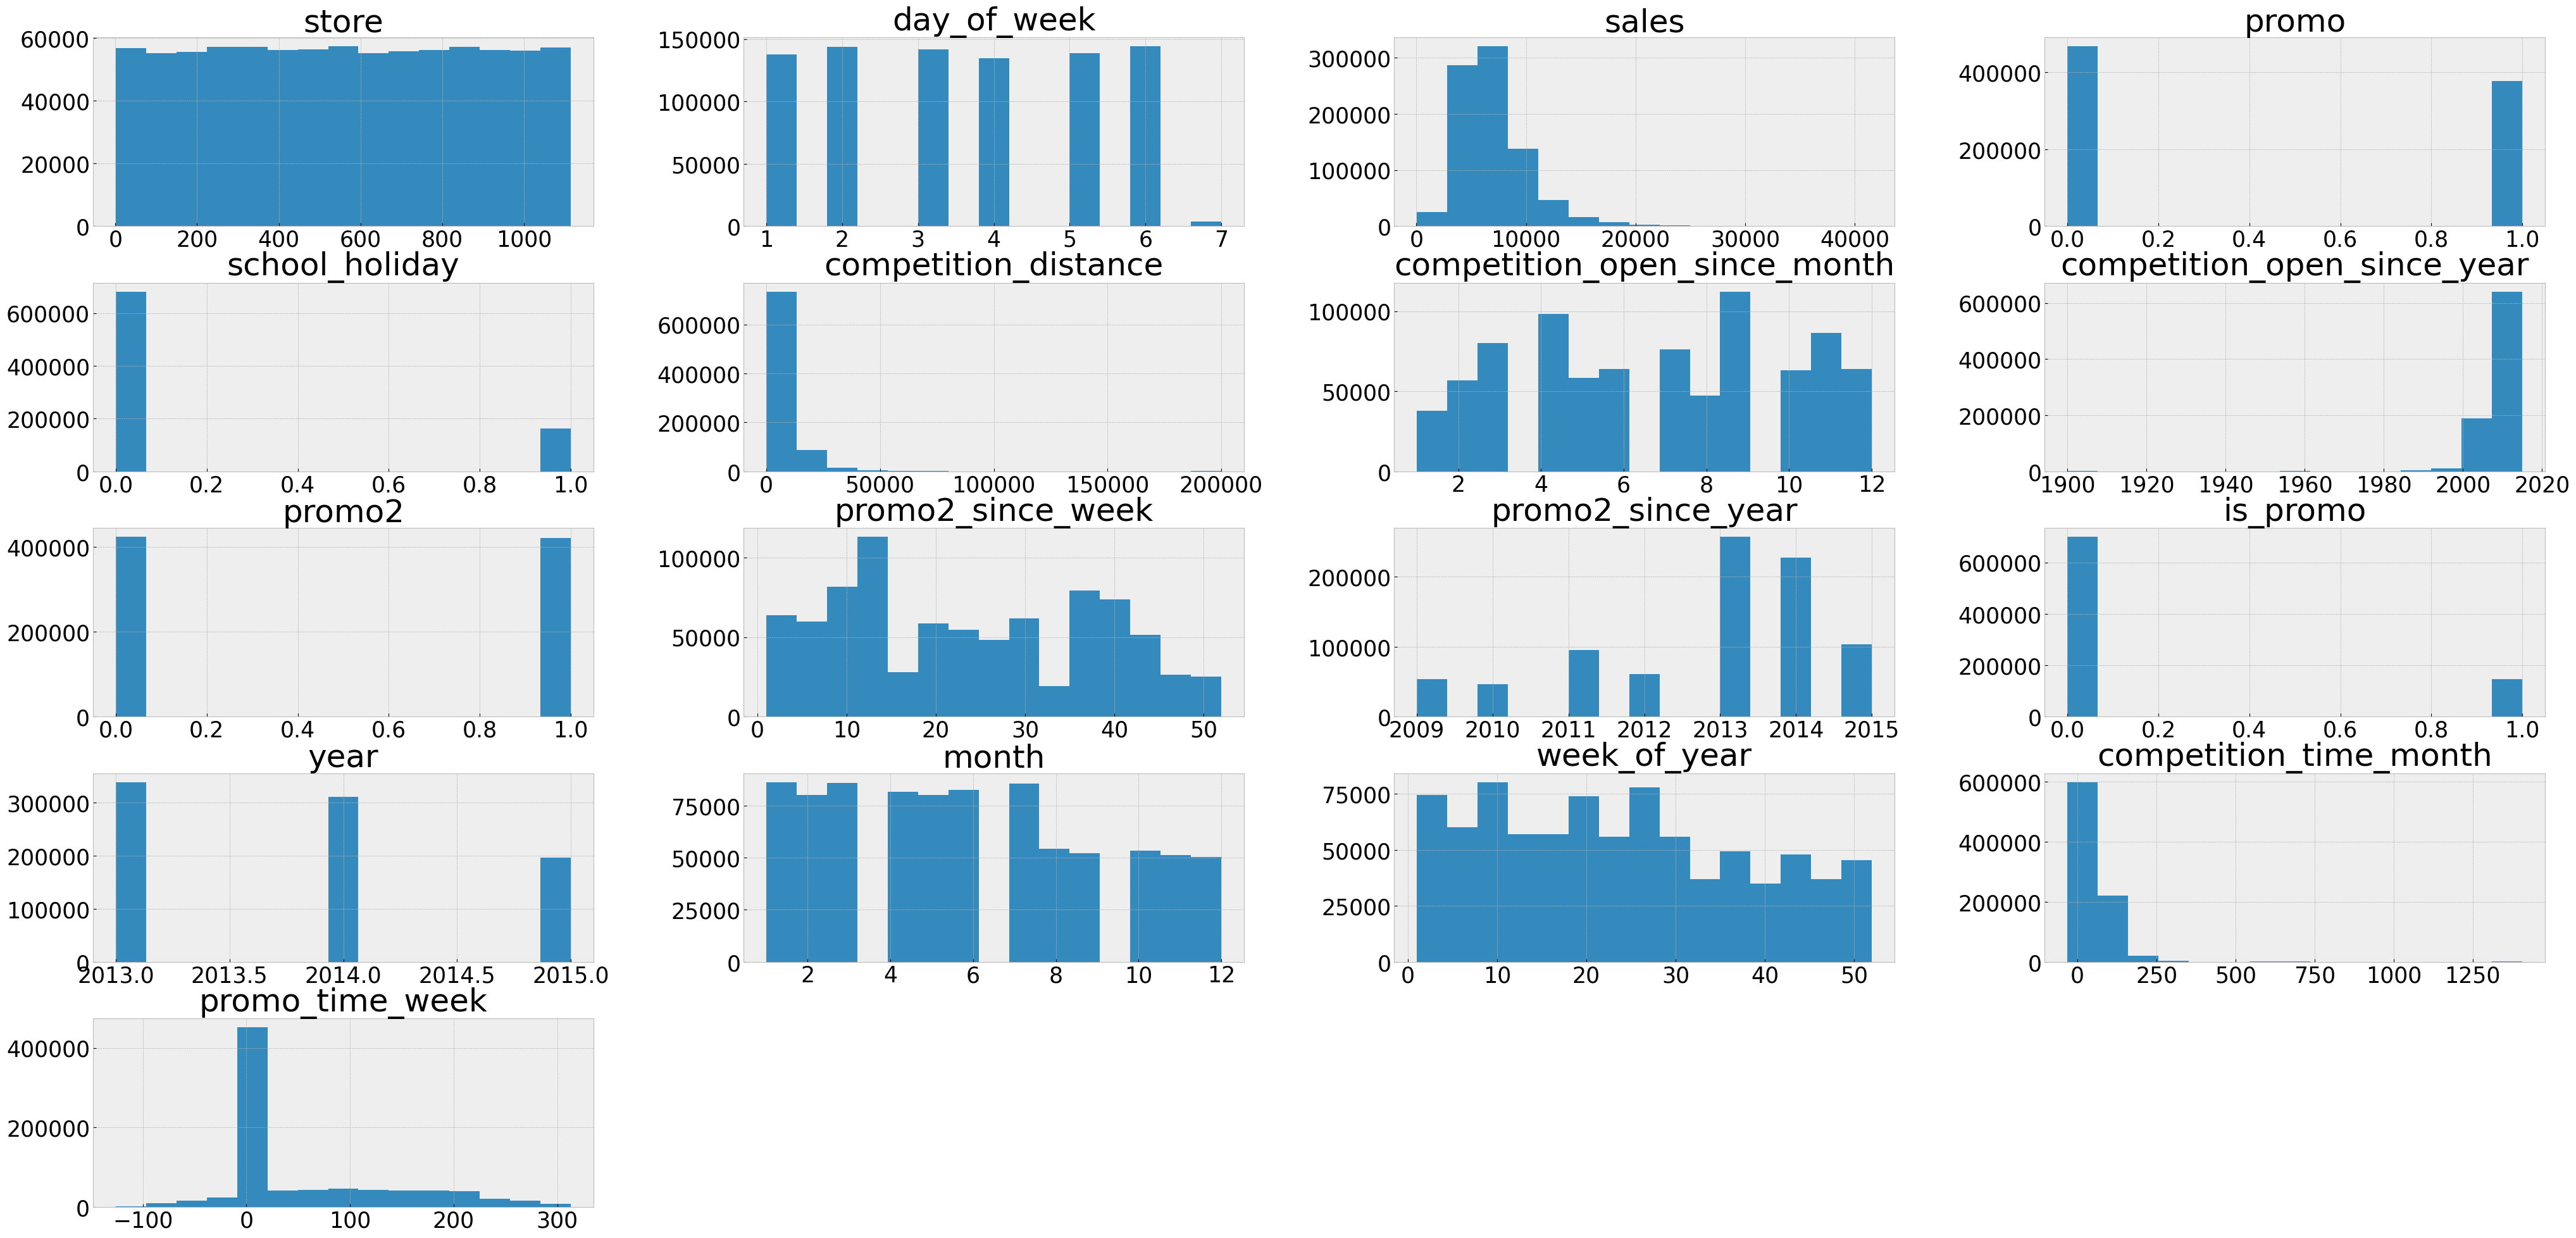

In [32]:
num_attributes.hist(bins=15);

#### Categorical Variable

In [34]:
cat_attributes.head(2)

,date,state_holiday,store_type,assortment,year_week,competition_since,promo_since
0,2015-07-31,regular_day,c,basic,2015-30,2008-09-01,2015-07-27
1,2015-07-31,regular_day,a,basic,2015-30,2007-11-01,2010-03-22


In [35]:
df4['state_holiday'].drop_duplicates()

0            regular_day
54837     public_holiday
107995    easter_holiday
199792         christmas
Name: state_holiday, dtype: object

F:\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

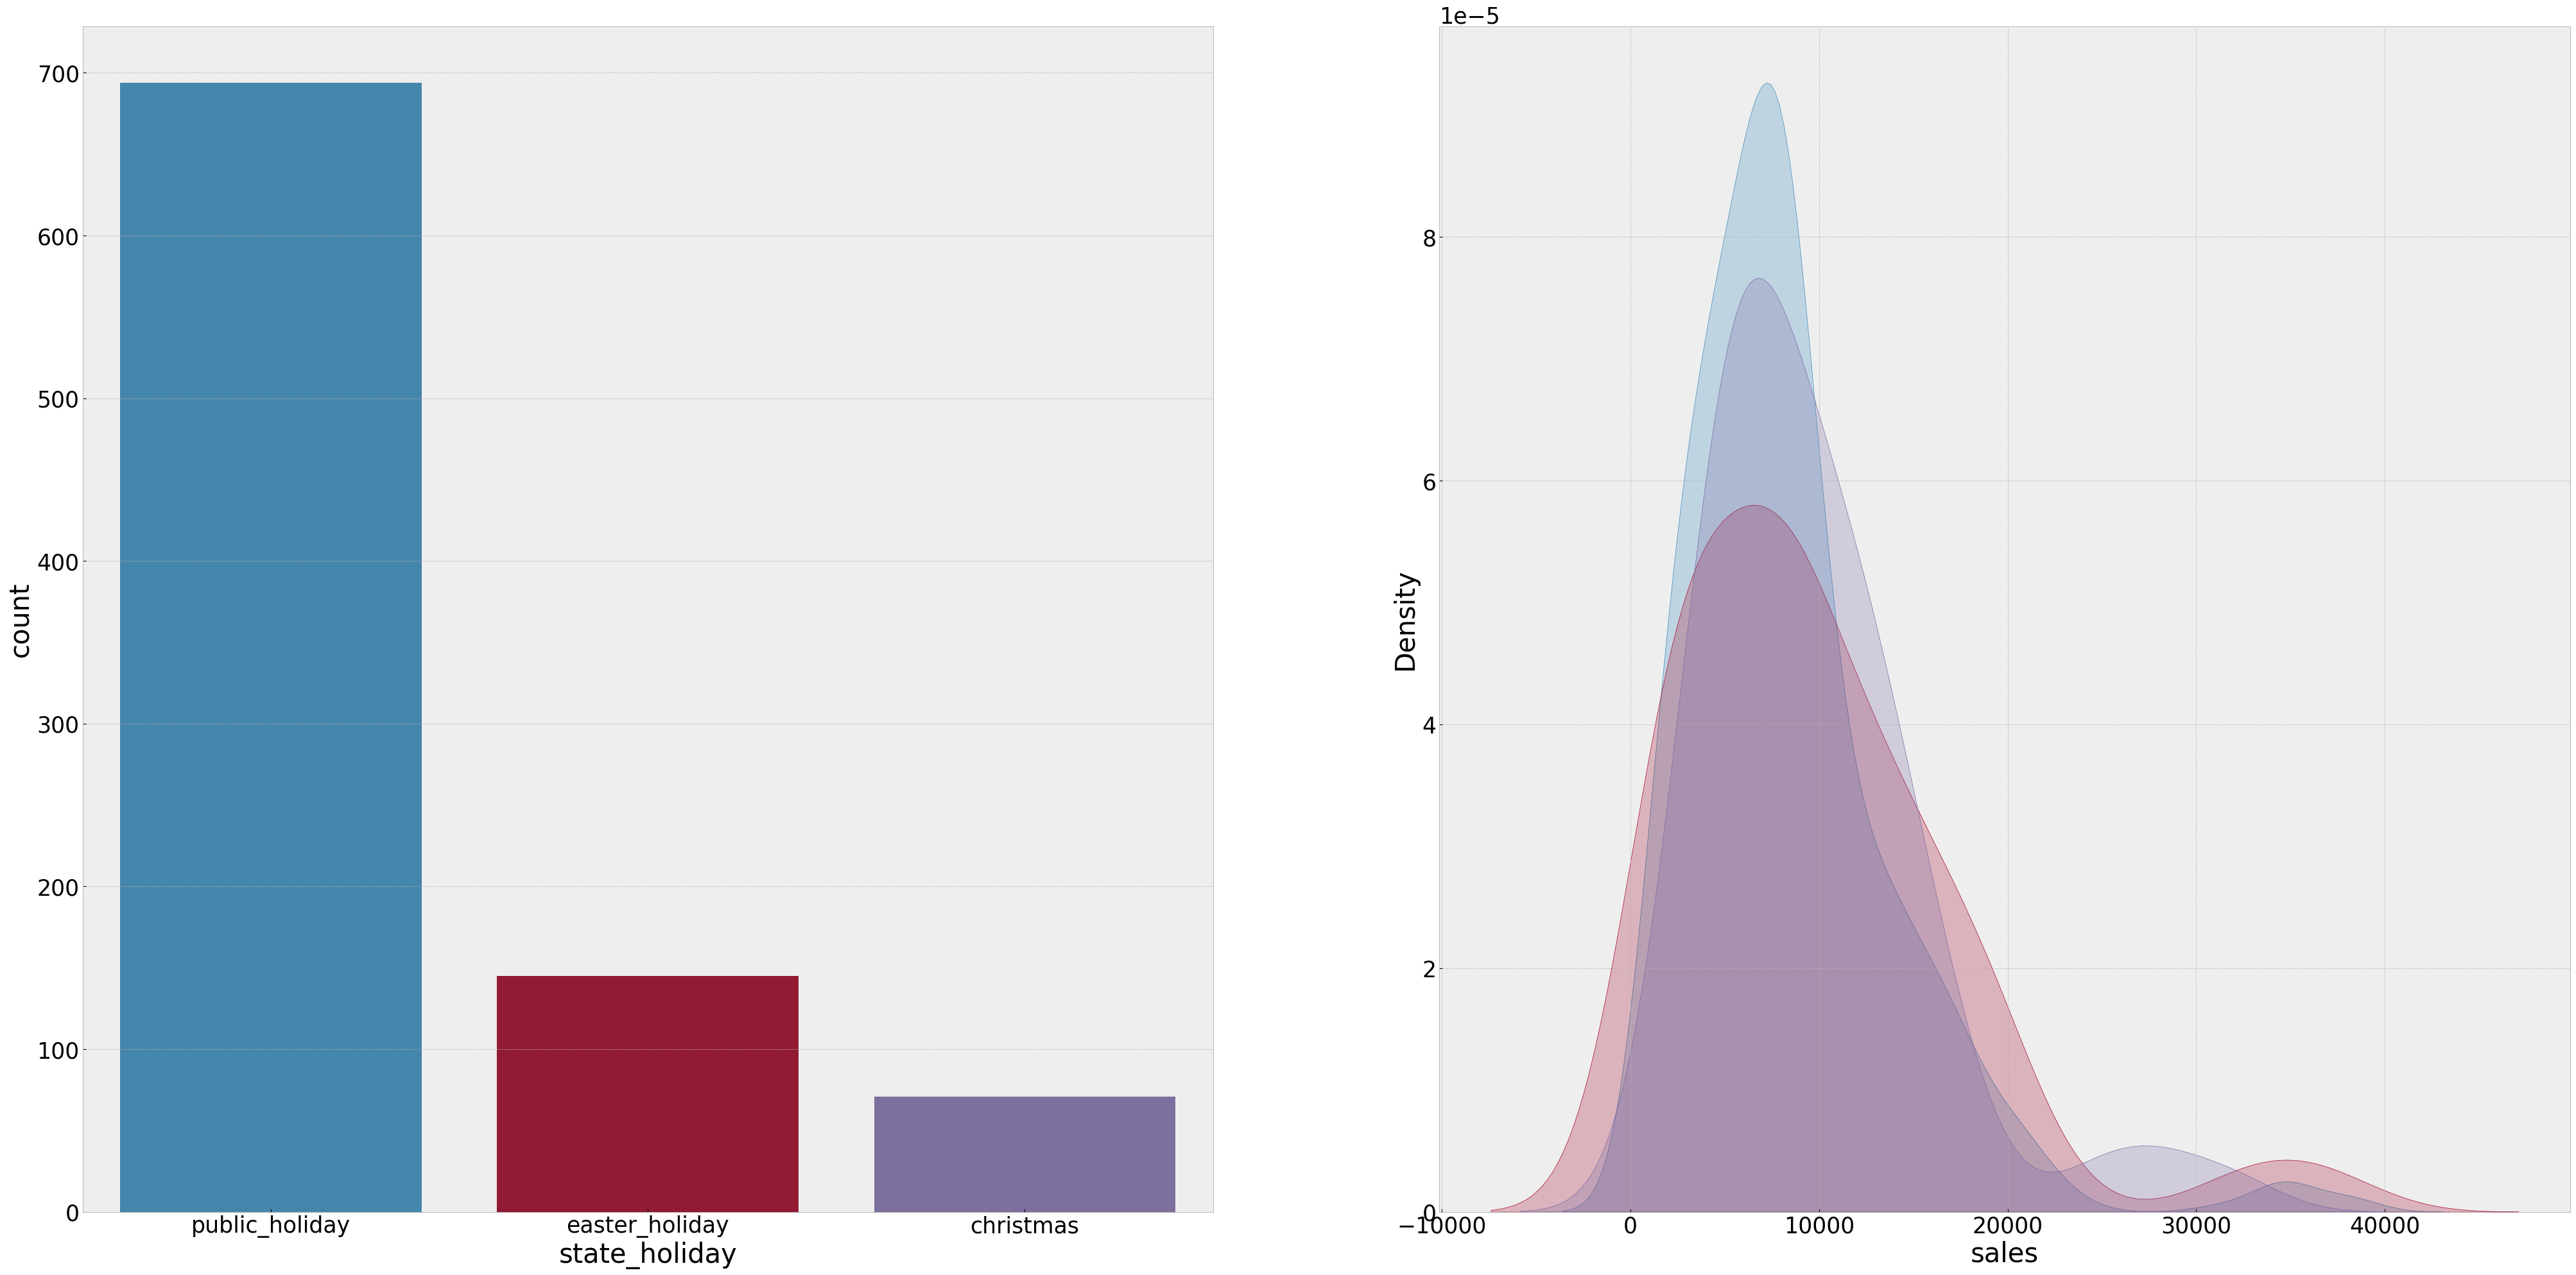

In [37]:
# state_holiday

plt.subplot(1, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(1, 2, 2)
sns.kdeplot( df4[df4['state_holiday']== 'public_holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot( df4[df4['state_holiday']== 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot( df4[df4['state_holiday']== 'christmas']['sales'], label='christmas', shade=True)


In [38]:
# store_type

df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

F:\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

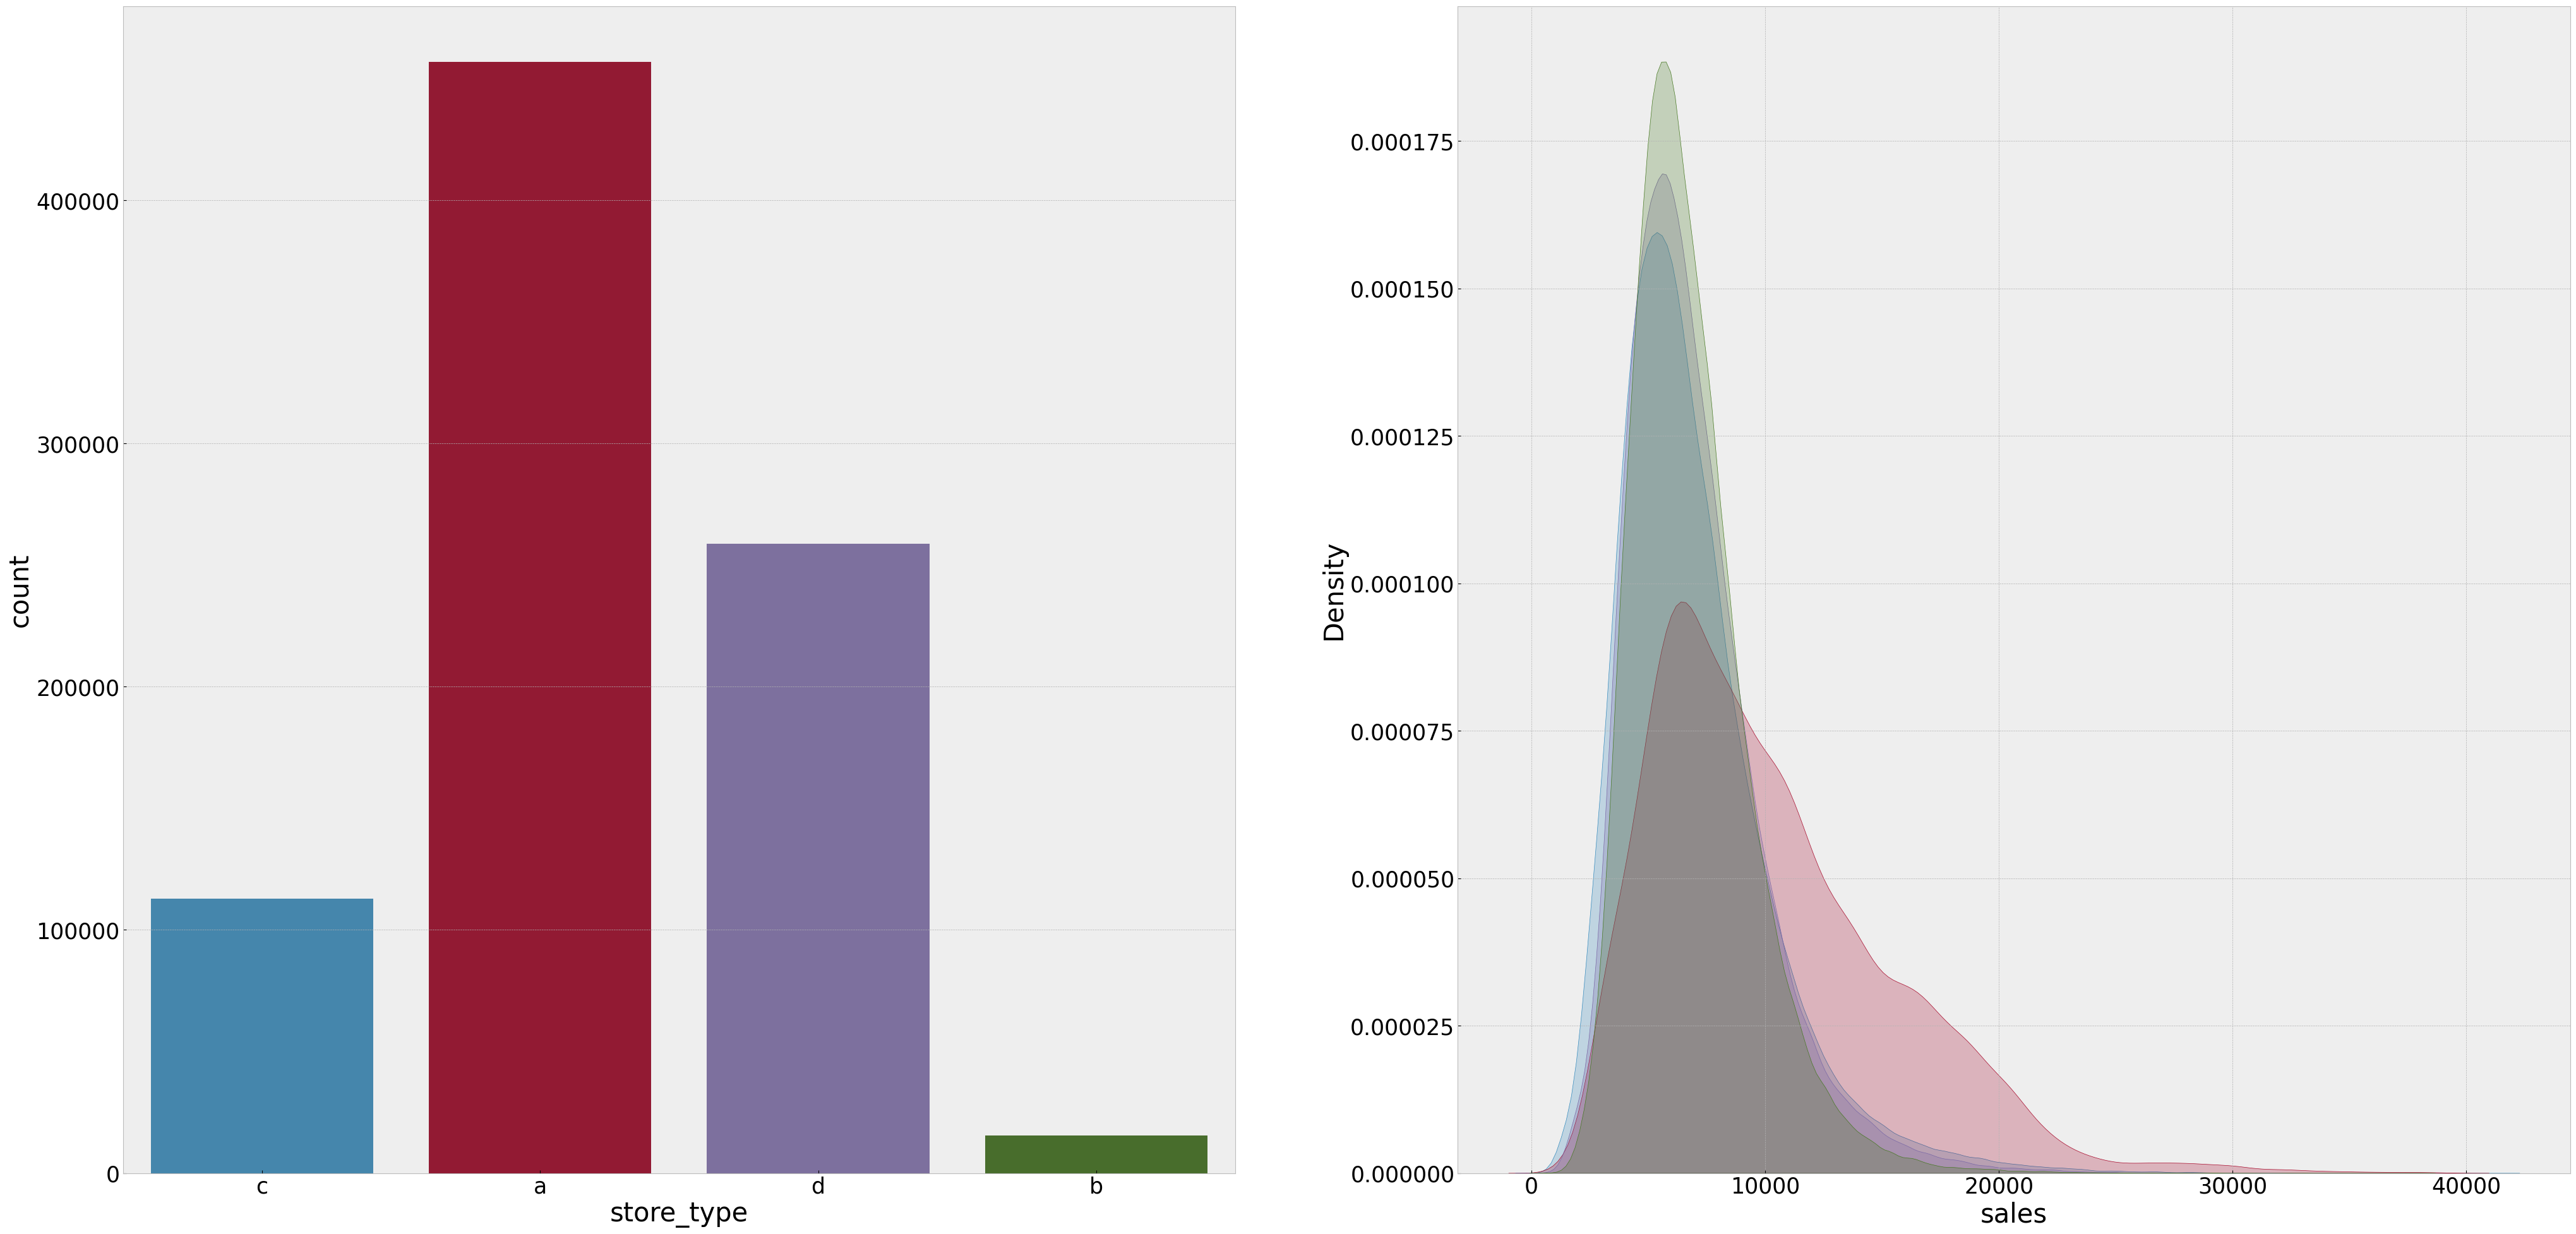

In [39]:
# store_type

plt.subplot(1, 2, 1)
a = df4[df4['store_type'] != 'regular_day']
sns.countplot(a['store_type']) 

plt.subplot(1, 2, 2)
sns.kdeplot( df4[df4['store_type']== 'a']['sales'], label='a', shade=True)
sns.kdeplot( df4[df4['store_type']== 'b']['sales'], label='b', shade=True)
sns.kdeplot( df4[df4['store_type']== 'c']['sales'], label='c', shade=True)
sns.kdeplot( df4[df4['store_type']== 'd']['sales'], label='d', shade=True)

In [40]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

F:\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

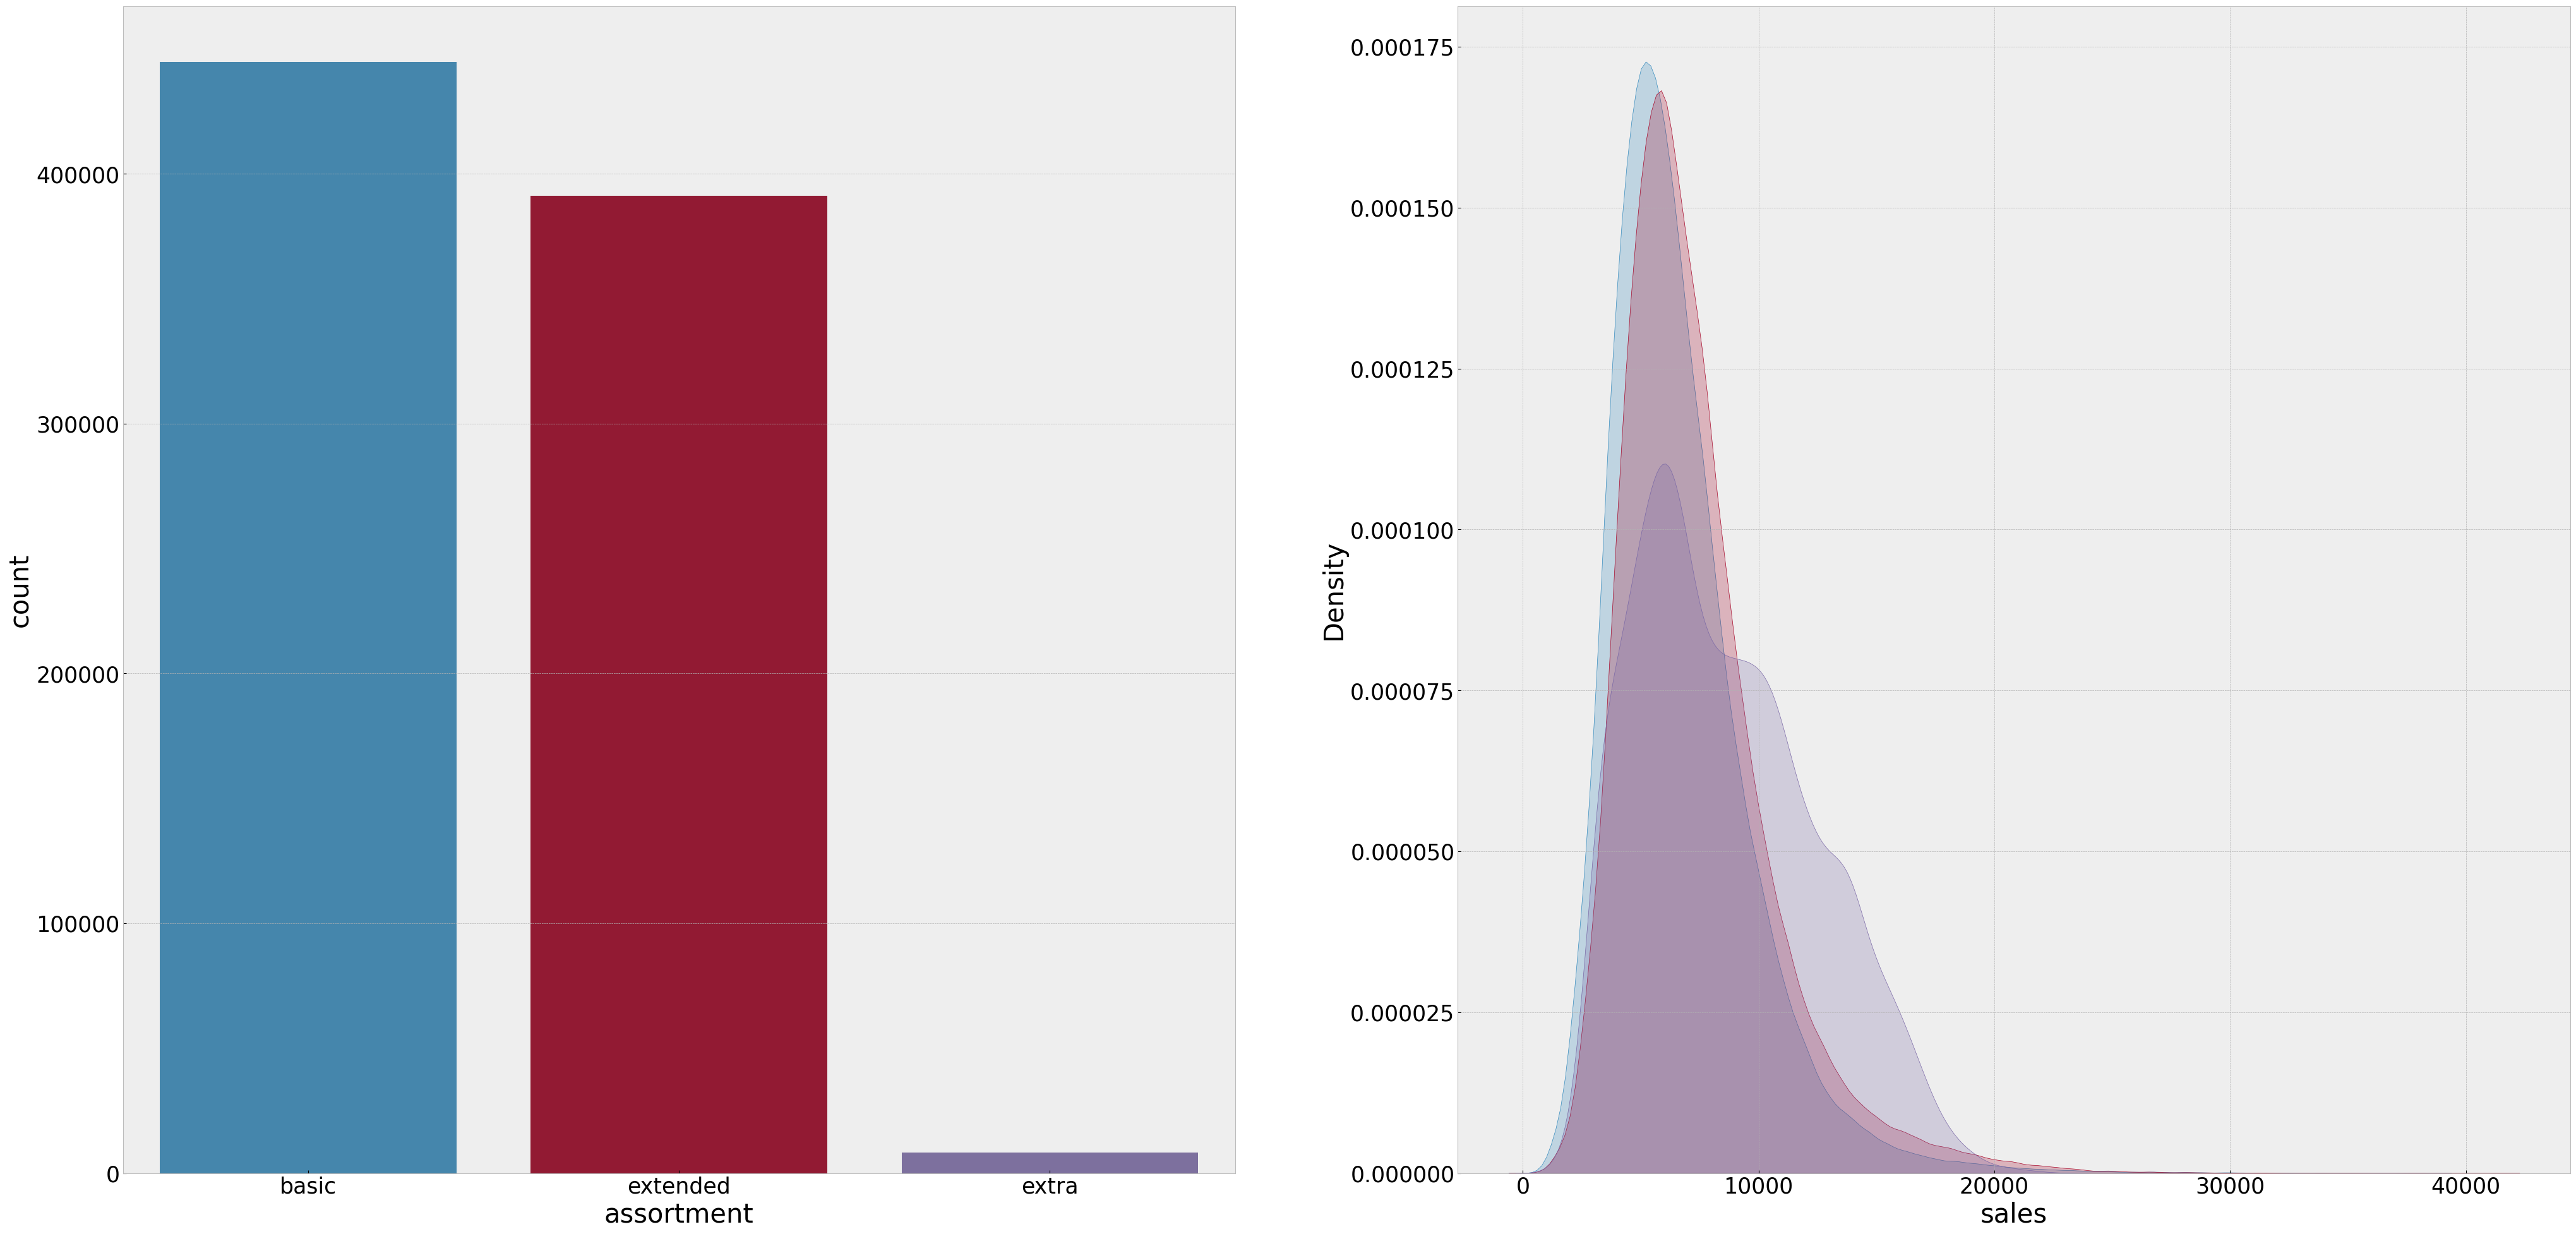

In [41]:
# assortment

plt.subplot(1, 2, 1)
a = df4[df4['assortment'] != 'regular_day']
sns.countplot(a['assortment']) 

plt.subplot(1, 2, 2)
sns.kdeplot( df4[df4['assortment']== 'basic']['sales'], label='basic', shade=True)
sns.kdeplot( df4[df4['assortment']== 'extended']['sales'], label='extended', shade=True)
sns.kdeplot( df4[df4['assortment']== 'extra']['sales'], label='extra', shade=True)


### Análise Bivariada

### 1 - Lojas com maior sortimento deveriam vender mais.

**Falsa** Lojas com MAIOR SORTIMENTO vendem MENOS.

<AxesSubplot:xlabel='year_week'>

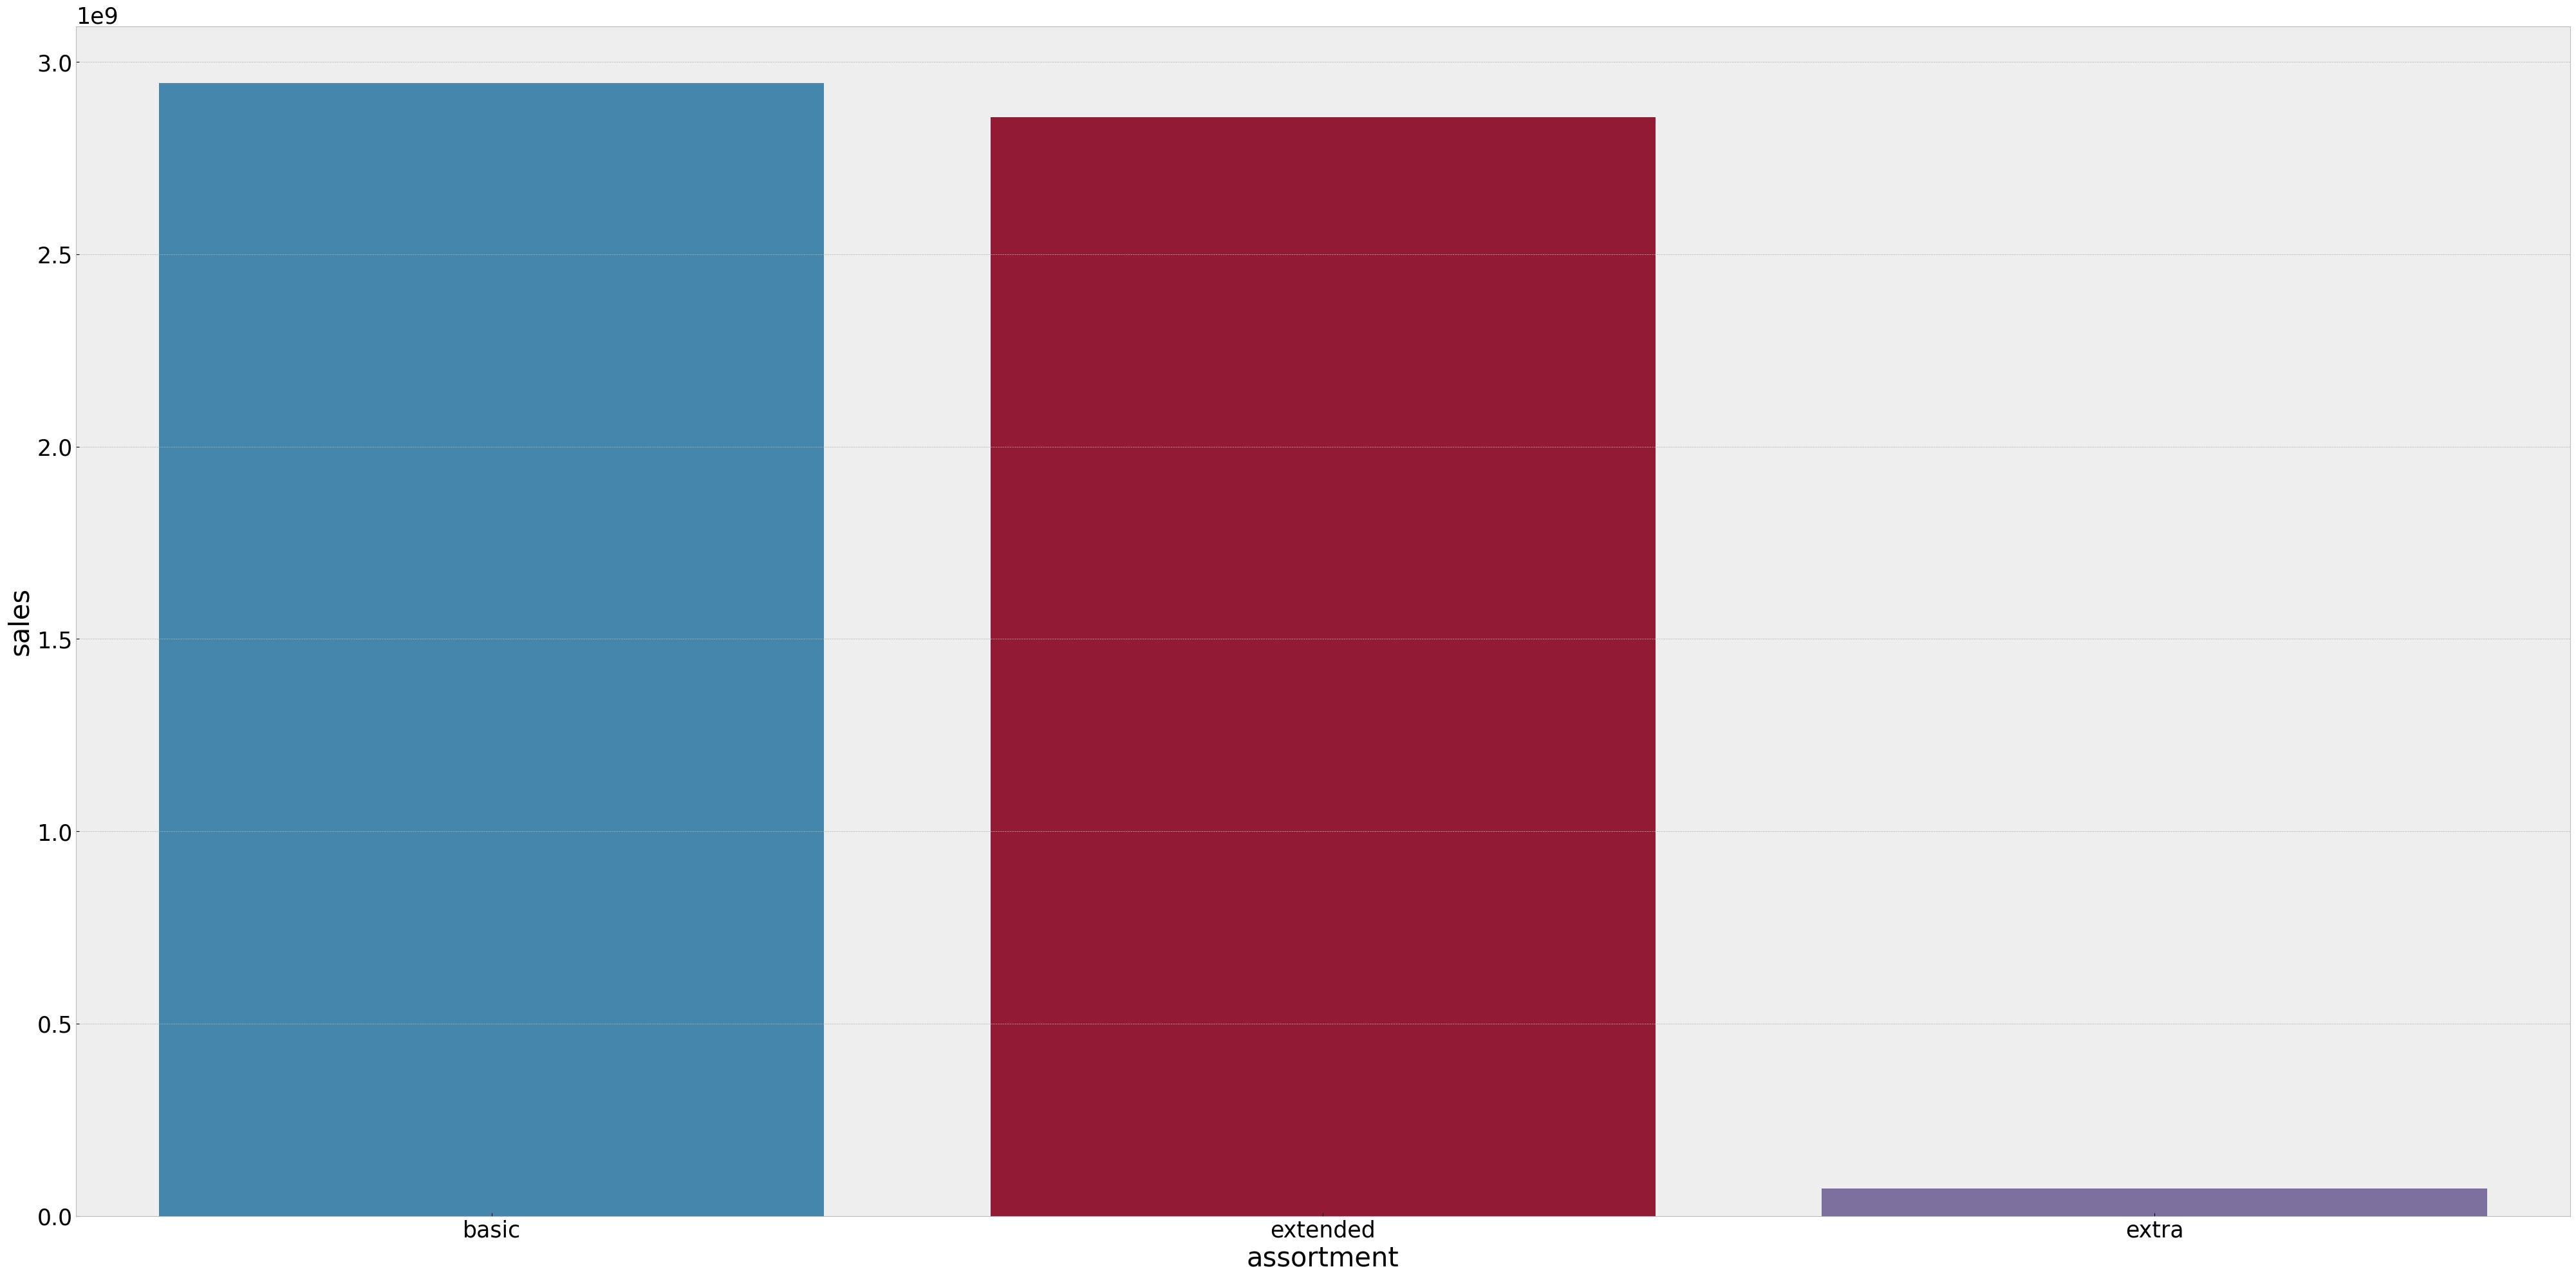

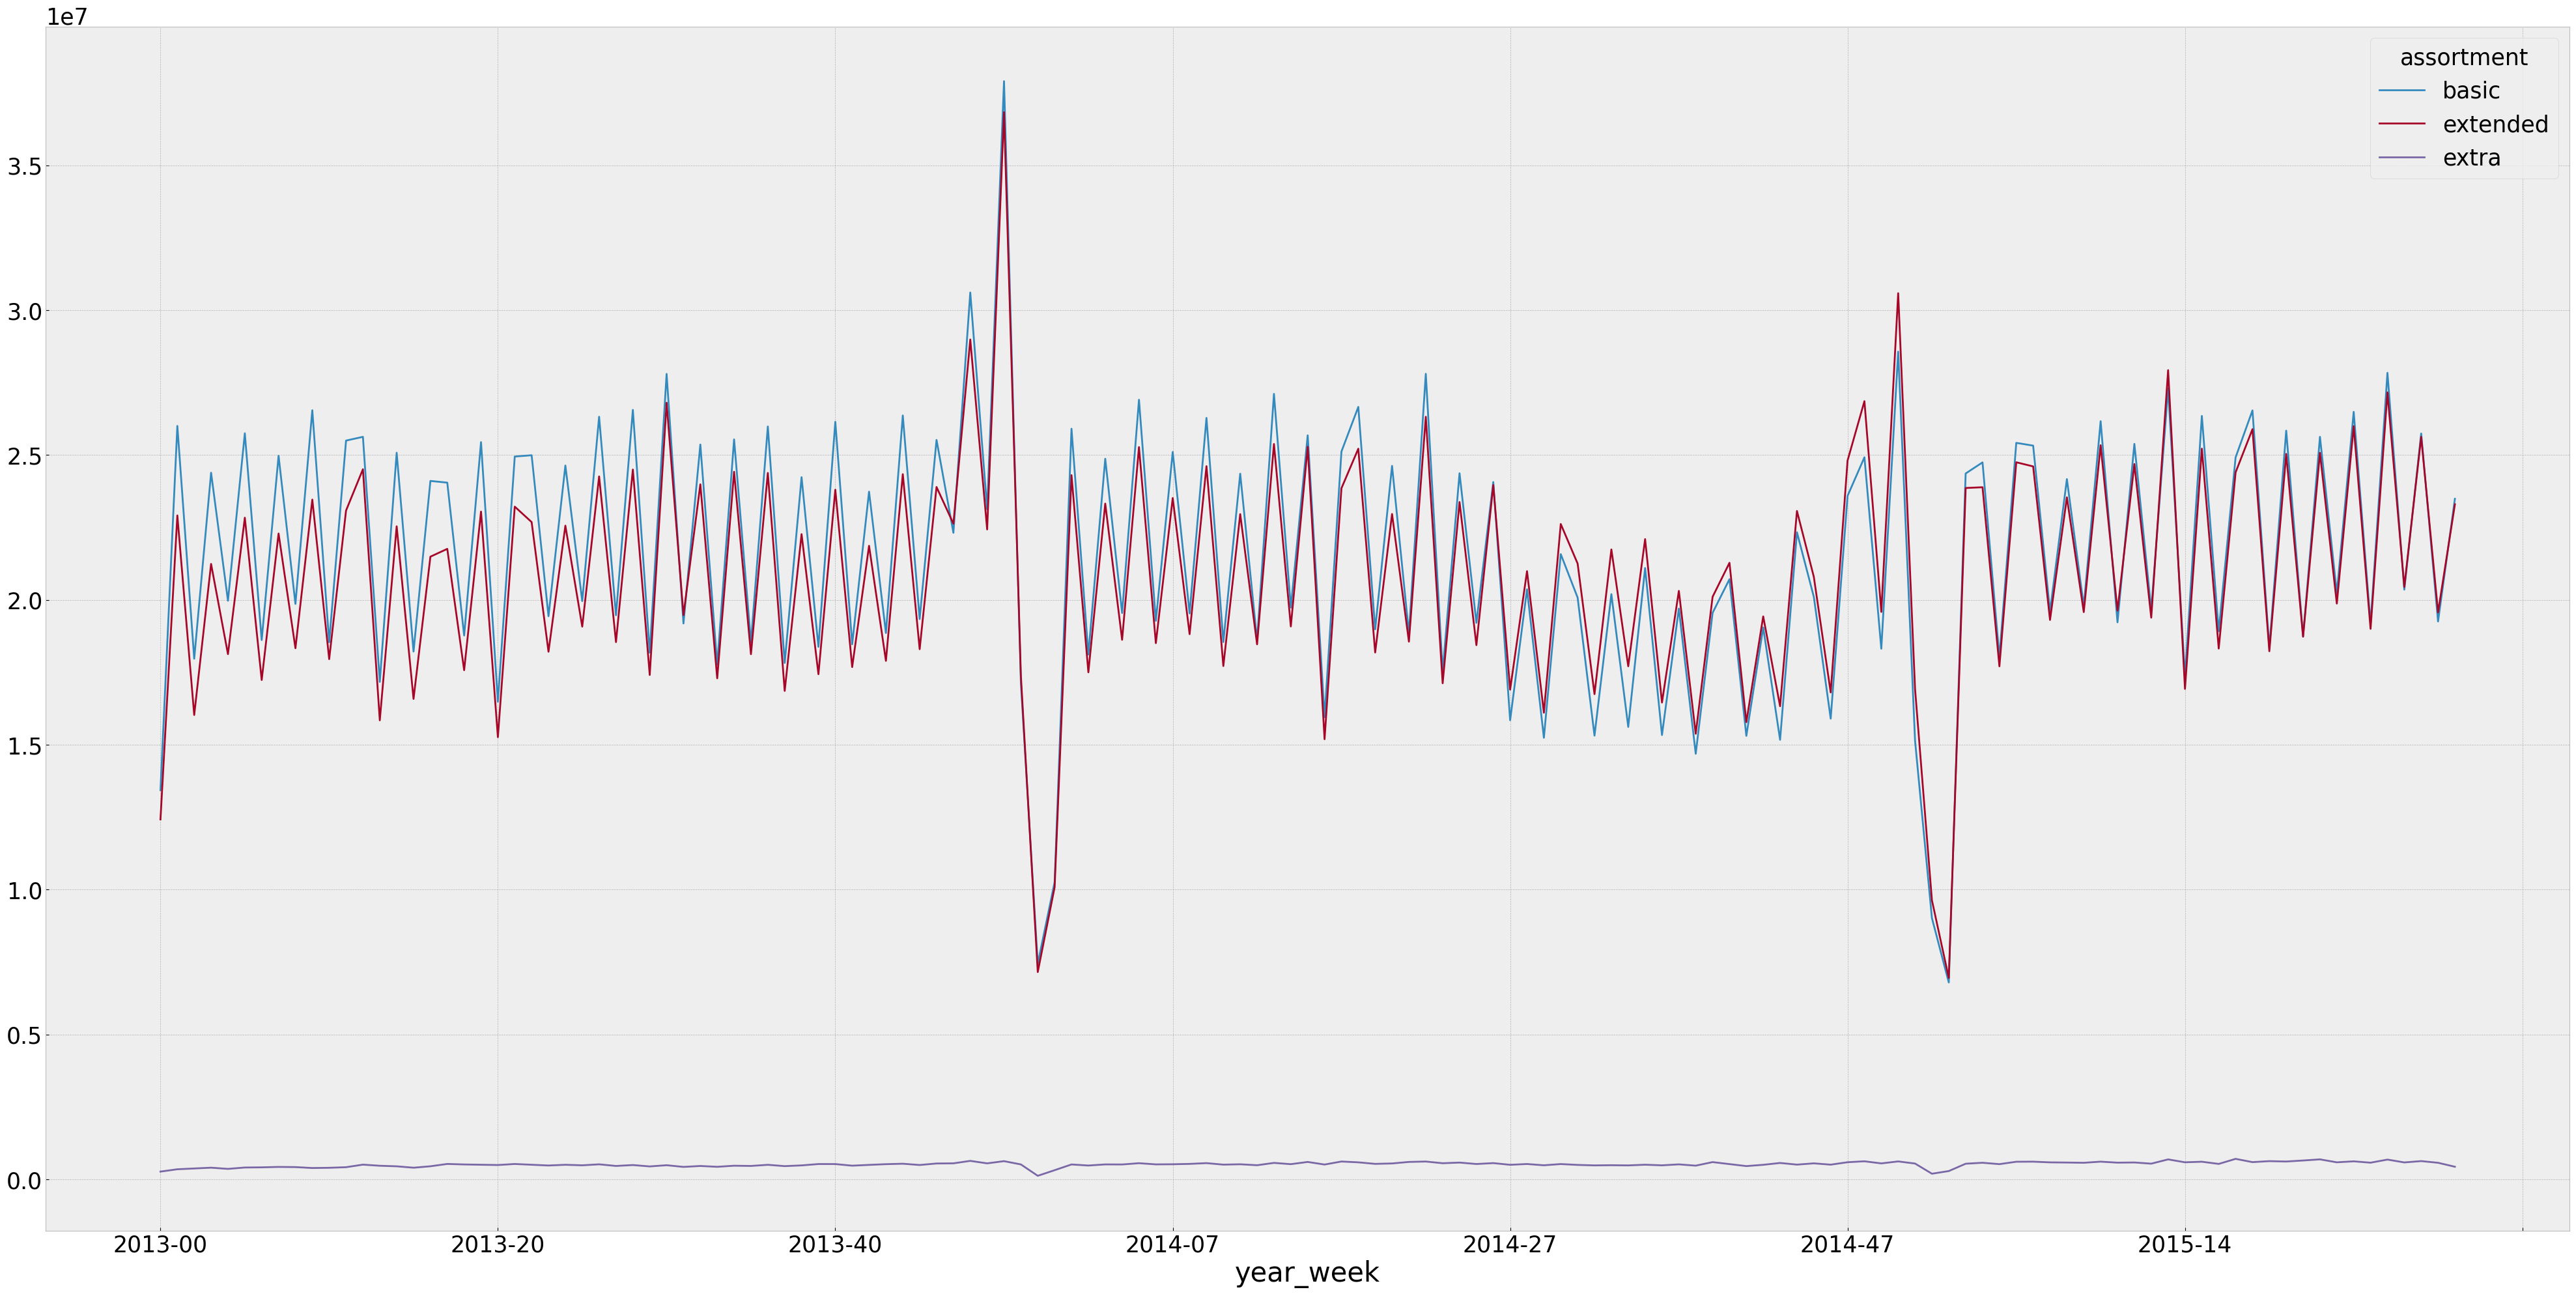

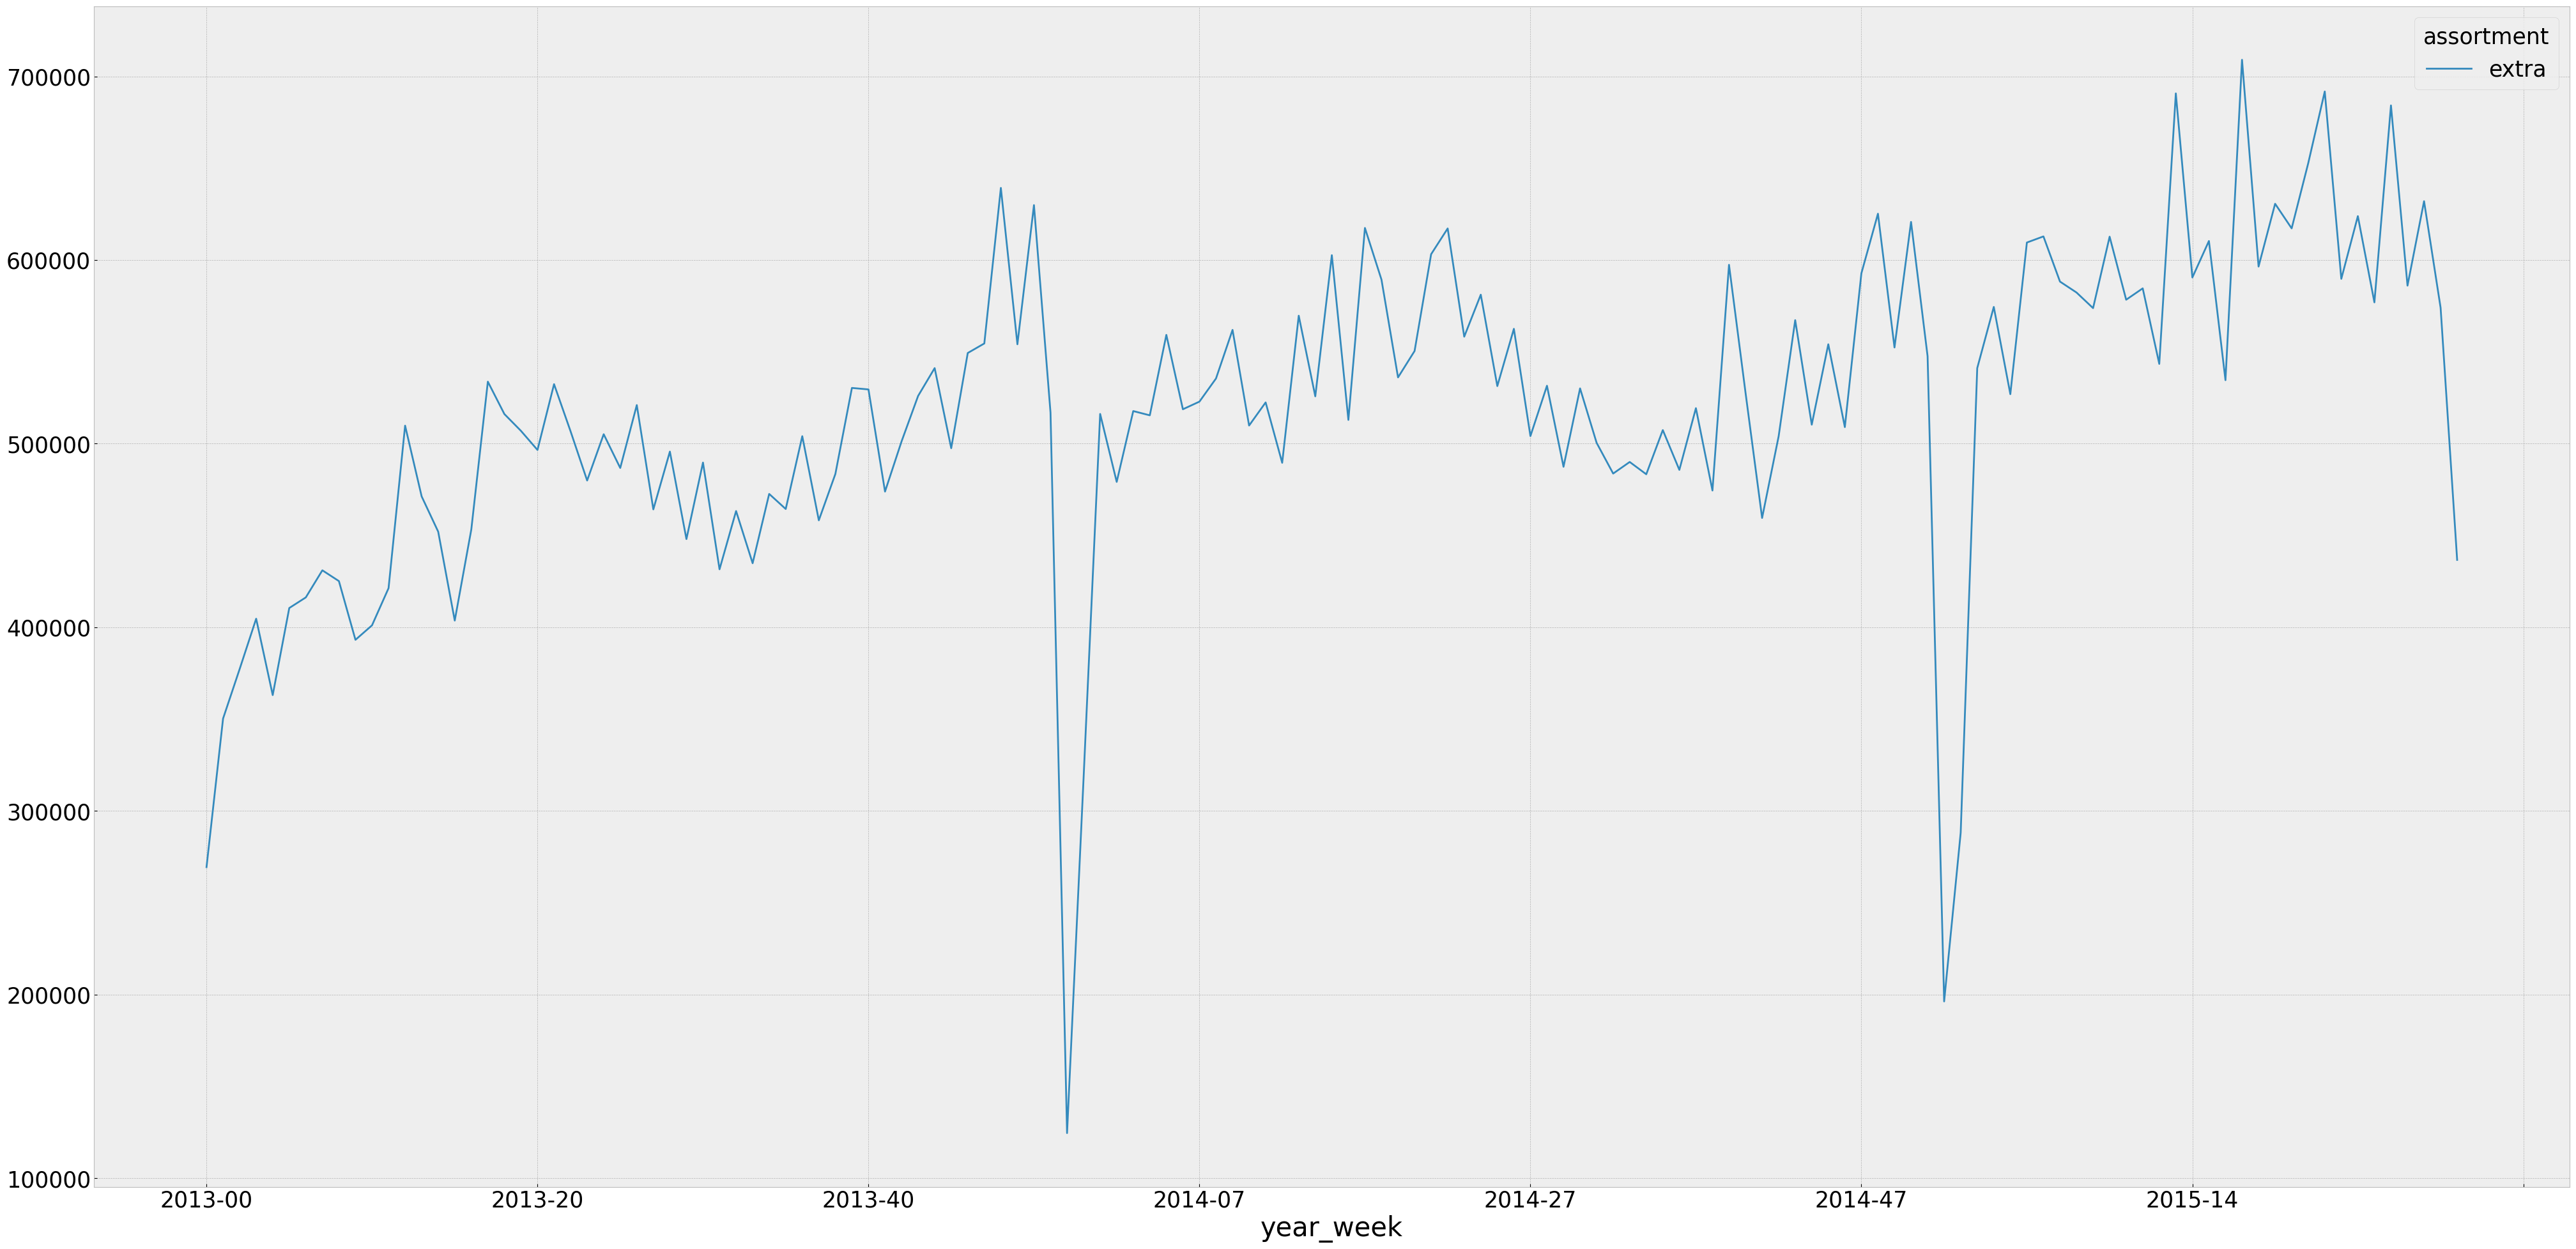

In [50]:
aux1 =df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data= aux1);

aux2 =df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

aux3 =aux2[aux2['assortment']=='extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()


### 2 - Lojas com competidores mais próximos deveriam vender menos

**Falsa** Lojas com competidores mais próximos vendem mais.

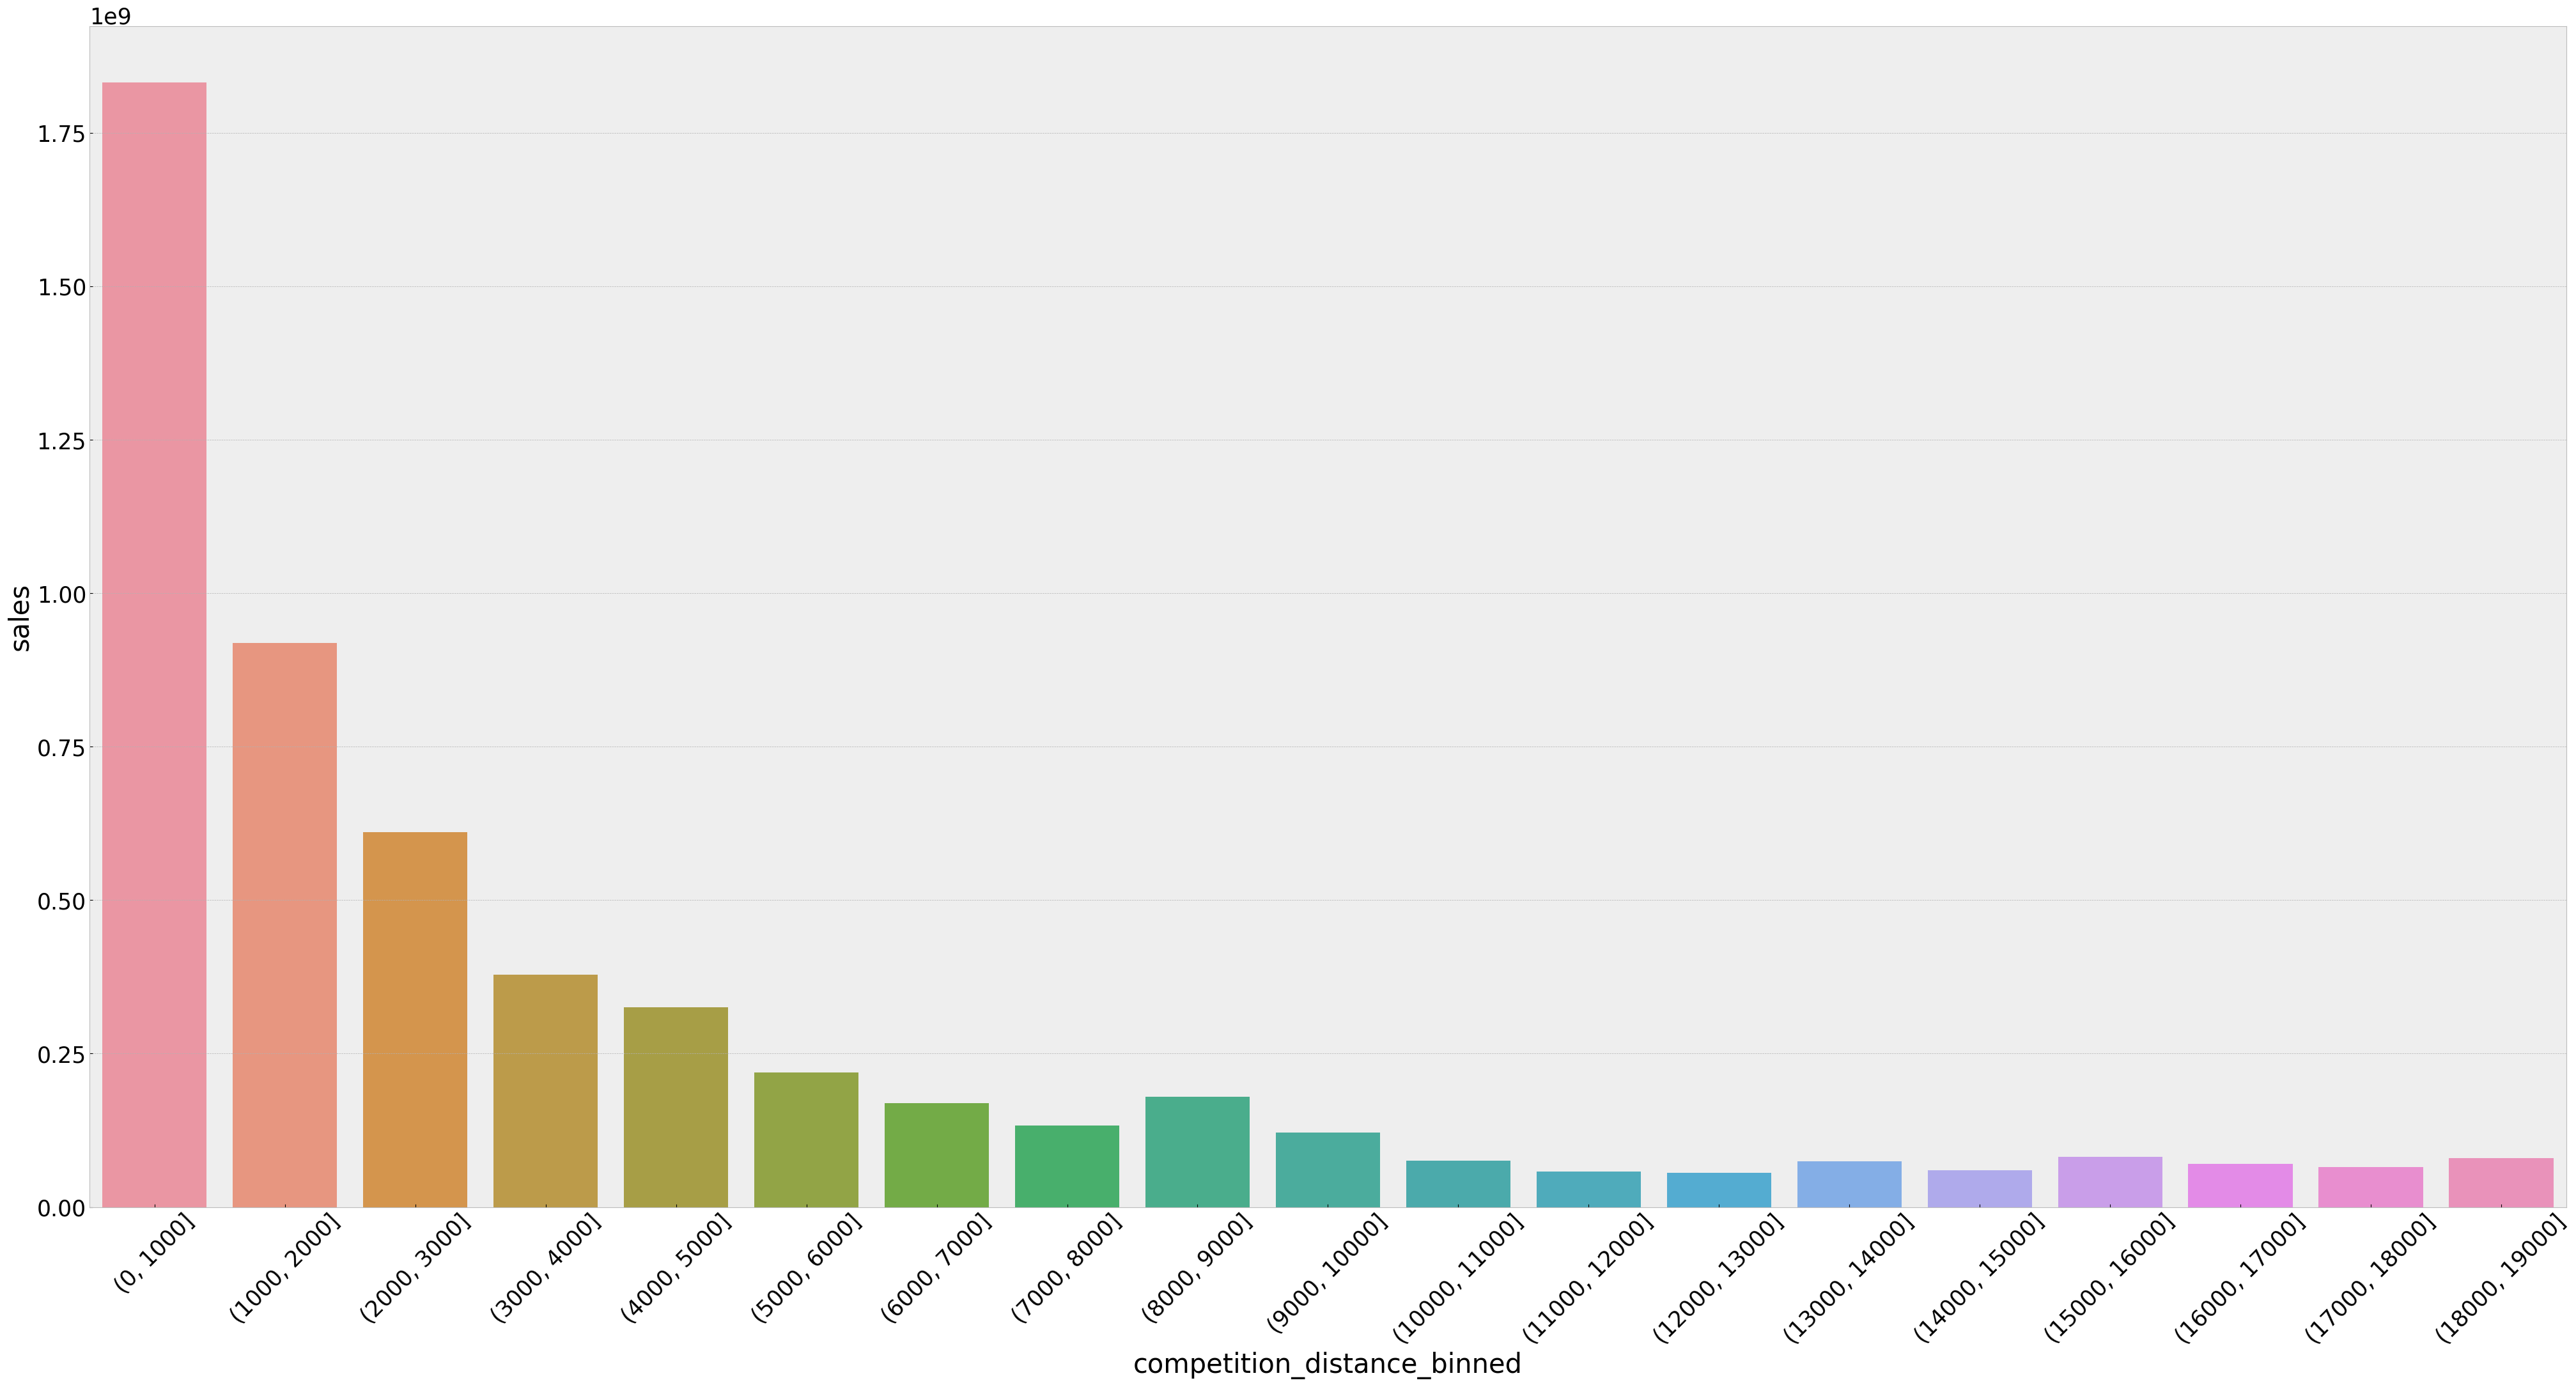

In [57]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

bins = list(np.arange(0,20000,1000))

aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],bins=bins)

aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x='competition_distance_binned', y='sales', data=aux2);

plt.xticks(rotation=45); # para rotacionar os numeros da linha x

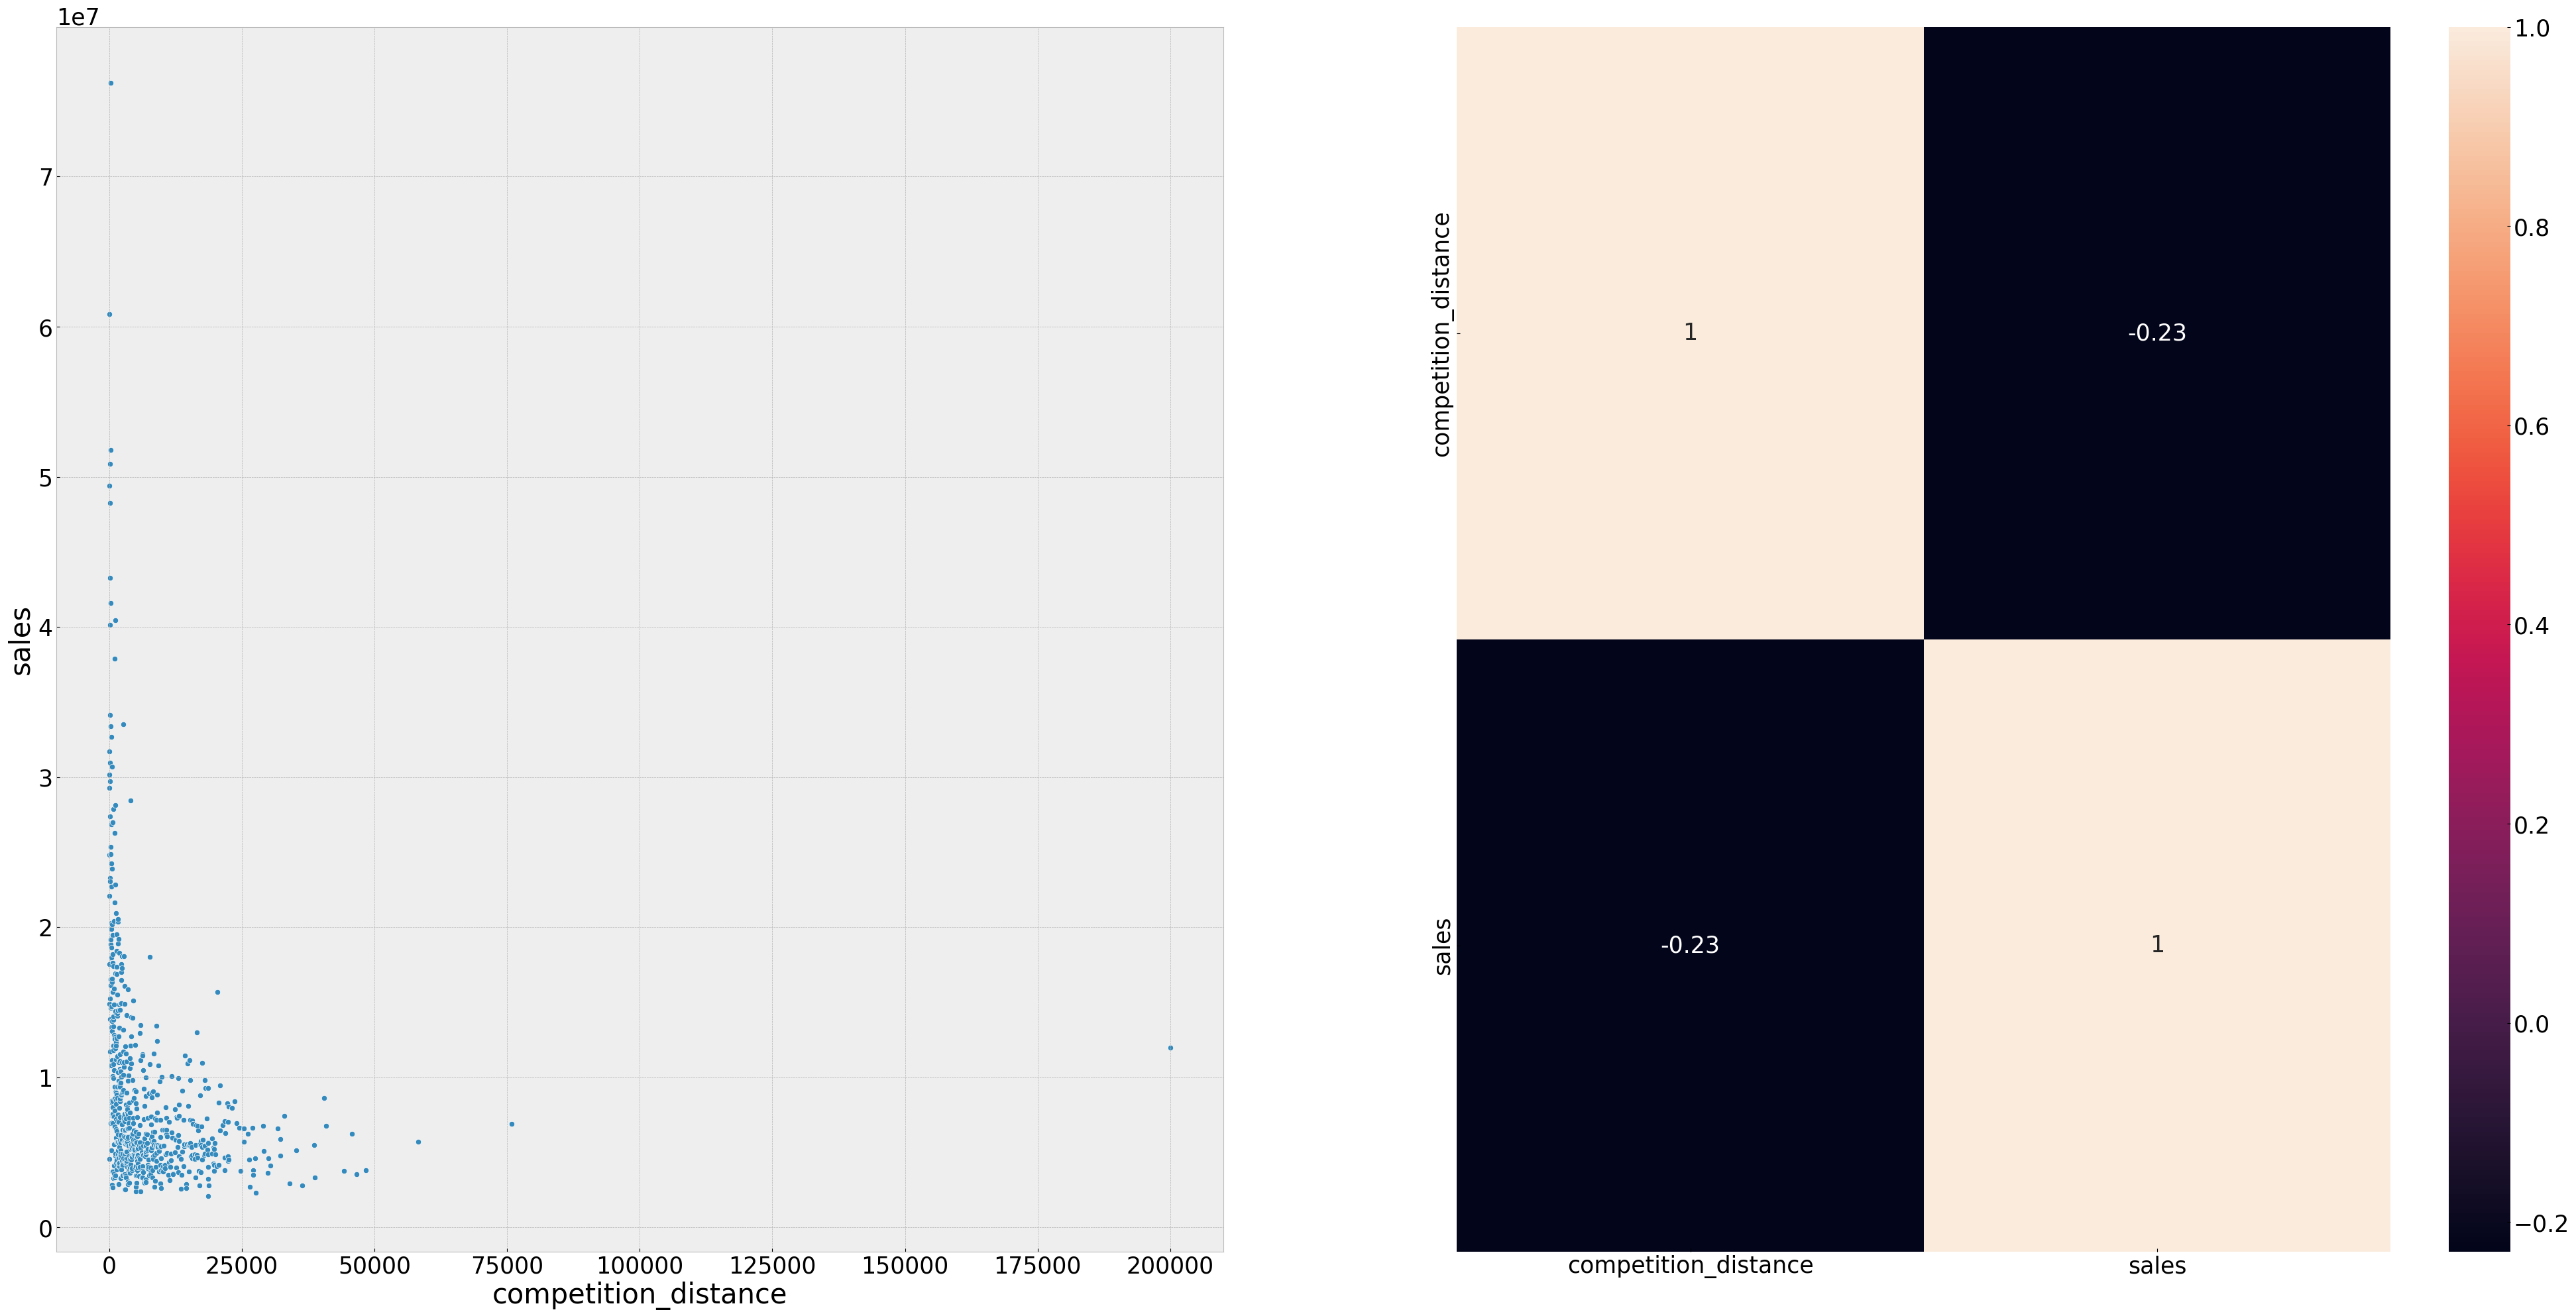

In [56]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 2, 1)
sns.scatterplot( x ='competition_distance', y='sales' , data=aux1);

plt.subplot(1, 2, 2)
sns.heatmap (aux1.corr(method = 'pearson'), annot=True);

### 3 - Lojas com competidores a mais tempo deveriam vender mais.

**Falsa** Lojas com competidores a mais tempo vendem menos.

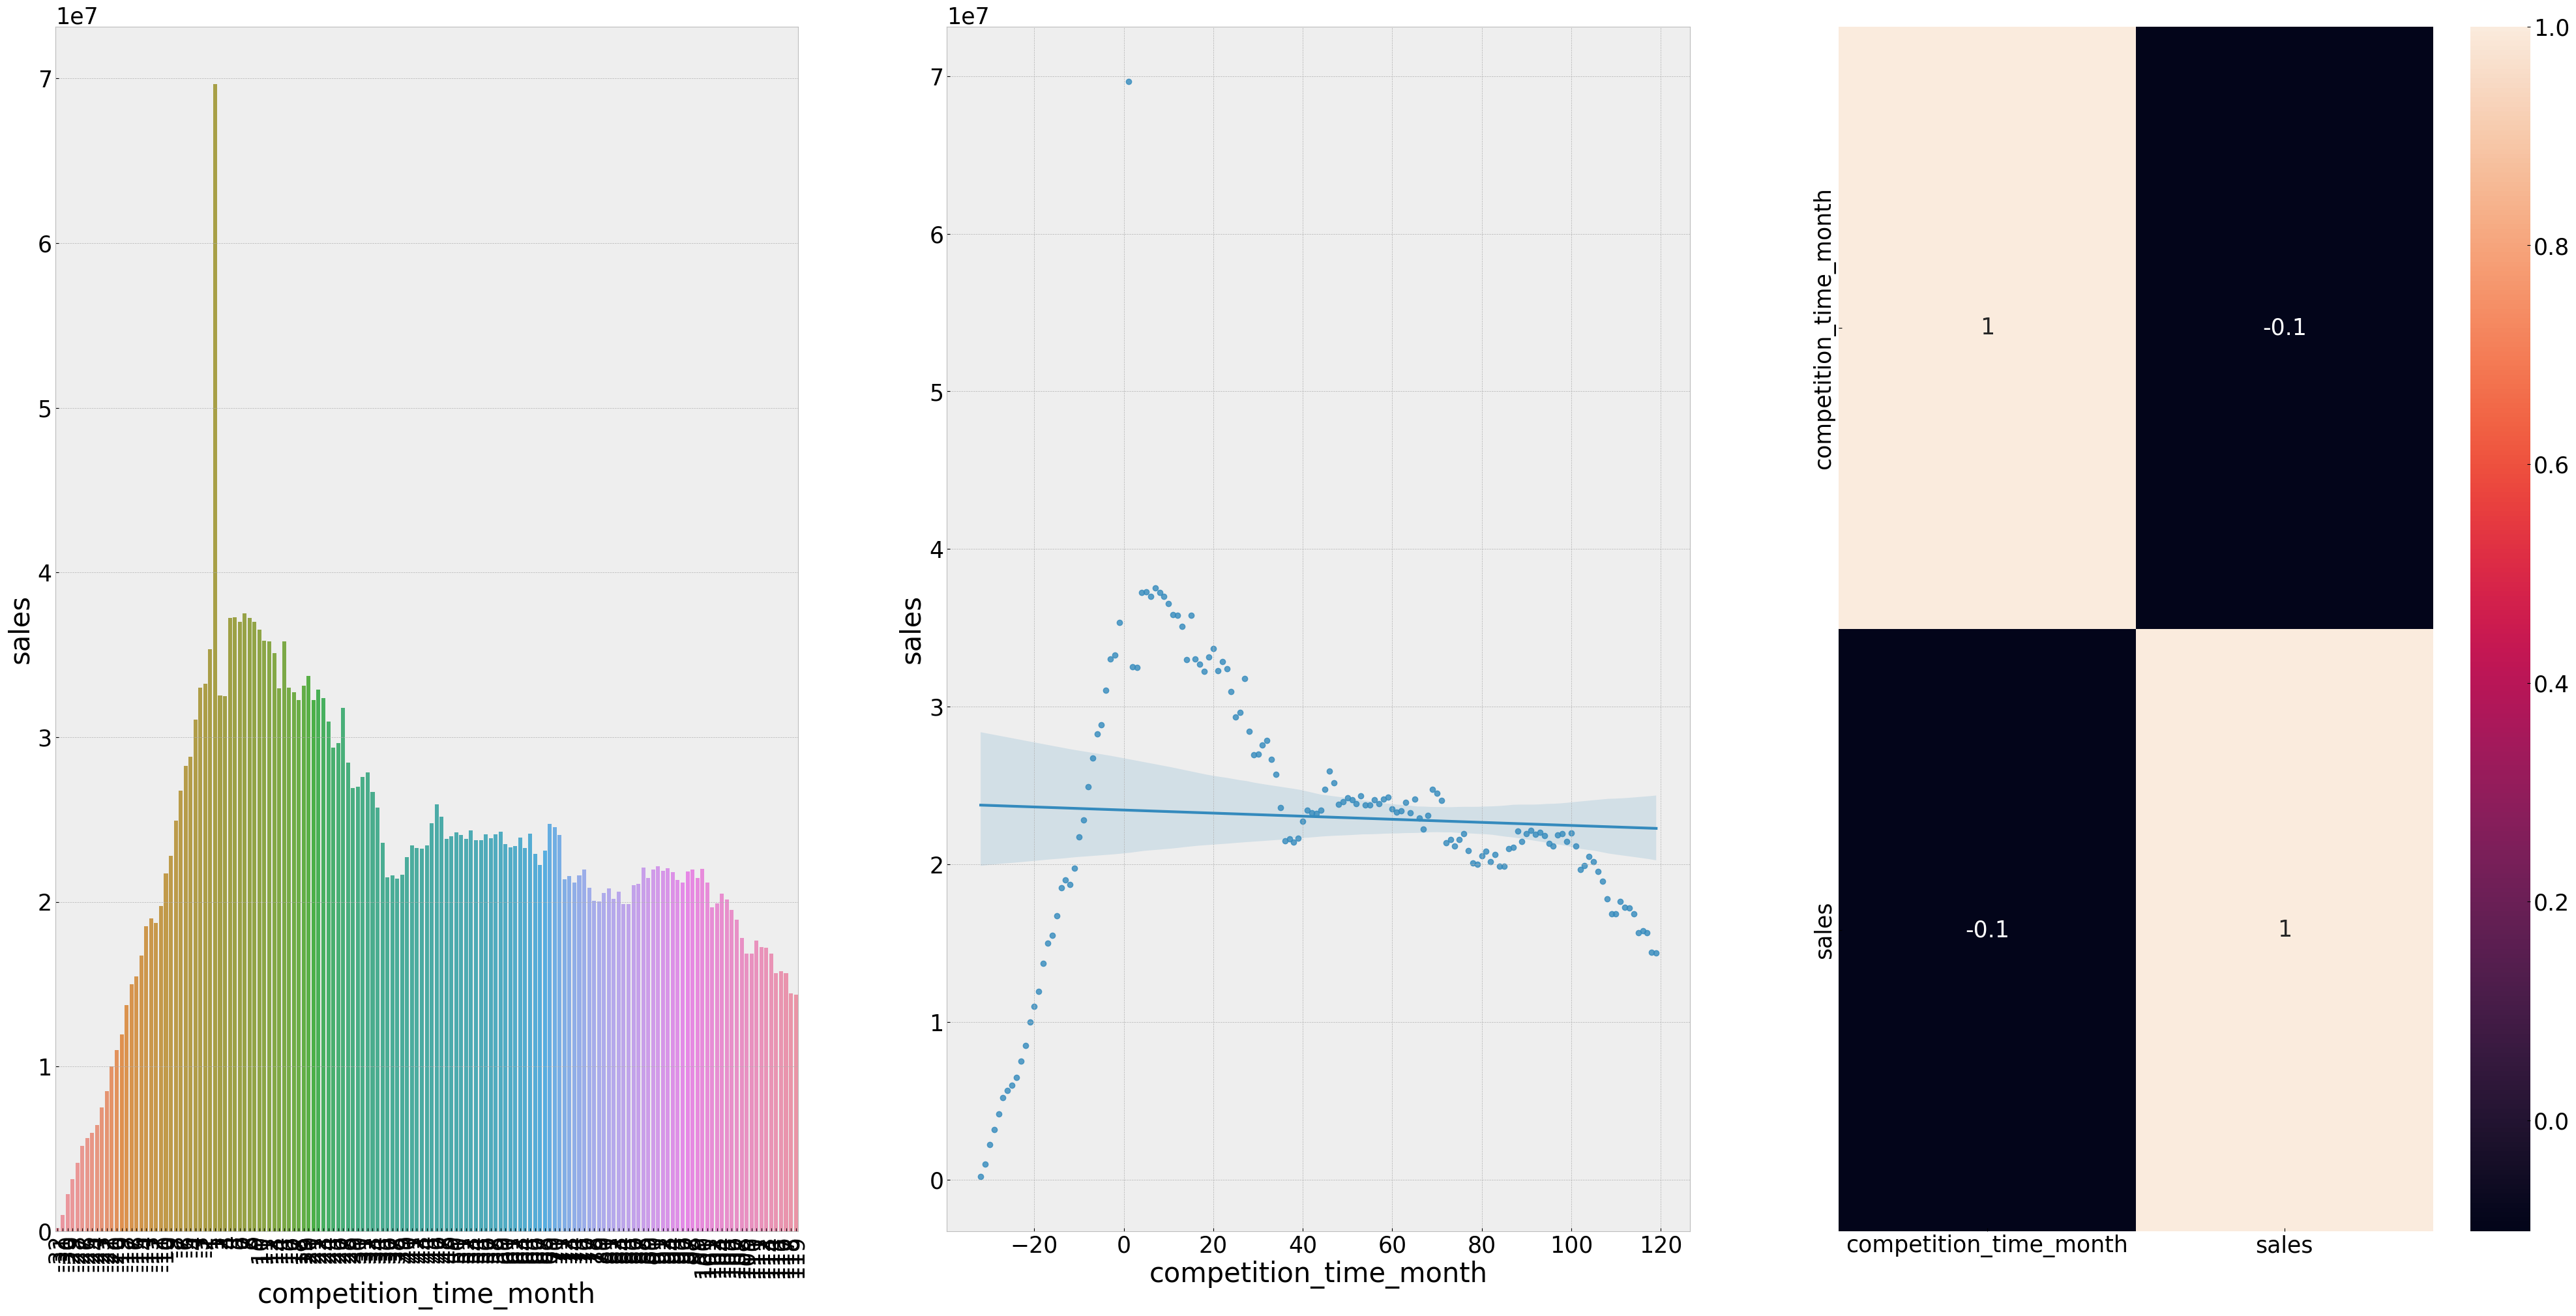

In [67]:

aux1 = df4 [['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120)  & (aux1['competition_time_month'] != 0)]

plt.subplot(1, 3, 1)
sns.barplot( x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation= 90);

plt.subplot(1, 3, 2)
sns.regplot( x='competition_time_month', y='sales', data=aux2);

plt.subplot(1, 3, 3)
sns.heatmap (aux1.corr(method = 'pearson'), annot=True);

### Análise Multivariada